In [7]:
from PIL import Image

In [10]:
#img=Image.open("C:/Users/REHMAN COMPUTER/Desktop/Courses/Courses/web and hybrid development/2nd_class/images/x.png")

In [11]:
import numpy as np
imgarray=np.asarray(img)

NameError: name 'img' is not defined

In [10]:
type(imgarray) #tensor bn gai

numpy.ndarray

In [11]:
imgarray.shape

(1095, 1095, 4)

In [12]:
imgarray.flatten().shape

(4796100,)

In [12]:
import os, shutil
original_dataset_dir = 'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/dogs-vs-cats/train'


In [13]:
base_dir = 'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/workingDirectory'
os.mkdir(base_dir)
#make directory

In [14]:
train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


In [15]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats') #Directory with 
os.mkdir(validation_cats_dir) #validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') #Directory with 
os.mkdir(validation_dogs_dir) #validation dog pictures
test_cats_dir = os.path.join(test_dir, 'cats')
#Directory with test cat pictures
os.mkdir(test_cats_dir)


In [16]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [17]:
fname = ['cat.{}.jpg'.format(i) for i in range(10)] # for understanding

In [18]:
fname

['cat.0.jpg',
 'cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'cat.6.jpg',
 'cat.7.jpg',
 'cat.8.jpg',
 'cat.9.jpg']

In [19]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]


In [20]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst)
 #copy images from one to another

In [21]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    #Copies the next 500 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)


In [22]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    #Copies the next 500 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)



In [23]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [24]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [25]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Building your network

In [27]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Dense Classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# Configuring the model for training

In [29]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

# Data preprocessing

In [30]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape) 
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fitting the model using a batch generator

In [32]:
history = model.fit_generator(train_generator,steps_per_epoch=100,
                              epochs=30,validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 83s 825ms/step - loss: 0.6896 - acc: 0.5380 - val_loss: 0.6766 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 68s 679ms/step - loss: 0.6571 - acc: 0.6140 - val_loss: 0.6308 - val_acc: 0.6120
Epoch 3/30
100/100 [==============================] - 66s 662ms/step - loss: 0.6228 - acc: 0.6585 - val_loss: 0.7367 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 63s 631ms/step - loss: 0.5730 - acc: 0.7035 - val_loss: 0.6483 - val_acc: 0.6880
Epoch 5/30
100/100 [==============================] - 63s 628ms/step - loss: 0.5414 - acc: 0.7310 - val_loss: 0.6925 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 62s 624ms/step - loss: 0.5047 - acc: 0.7580 - val_loss: 0.6036 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 63s 628ms/step - loss: 0.4756 - acc: 0.7735 - val_loss: 0.5244 - val_acc: 0.7150
Epoch 8/30
100/100 [==============================] - 6

# Saving the model

In [33]:
model.save('cats_and_dogs_small_2.h5')

# Displaying curves of loss and accuracy during training


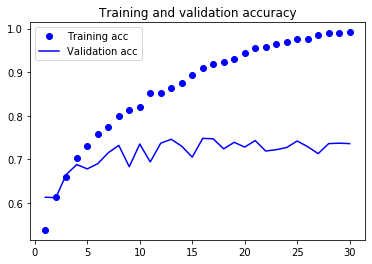

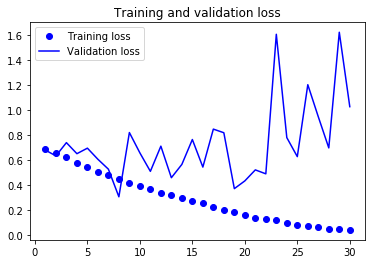

In [35]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Using data augmentation

# Setting up a data augmentation configuration via ImageDataGenerator


In [36]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.2,
                             horizontal_flip=True,fill_mode='nearest')

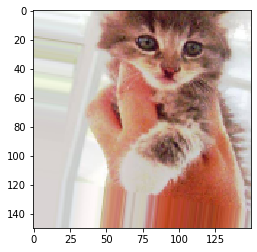

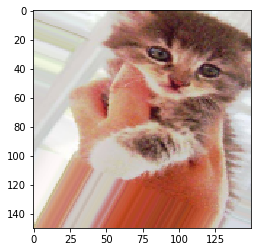

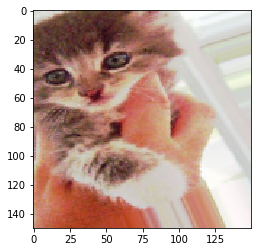

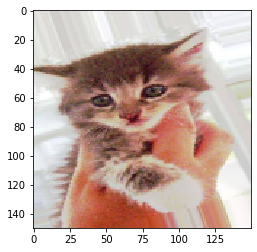

In [38]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Defining a new convnet that includes dropout

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

# Training the convnet using data-augmentation generators

In [40]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 116s 1s/step - loss: 0.6943 - acc: 0.5076 - val_loss: 0.6901 - val_acc: 0.5013
Epoch 2/100
100/100 [==============================] - 108s 1s/step - loss: 0.6847 - acc: 0.5631 - val_loss: 0.6851 - val_acc: 0.5773
Epoch 3/100
100/100 [==============================] - 108s 1s/step - loss: 0.6684 - acc: 0.5964 - val_loss: 0.6843 - val_acc: 0.5311
Epoch 4/100
100/100 [==============================] - 108s 1s/step - loss: 0.6520 - acc: 0.6196 - val_loss: 0.6494 - val_acc: 0.6276
Epoch 5/100
100/100 [==============================] - 107s 1s/step - loss: 0.6421 - acc: 0.6281 - val_loss: 0.7194 - val_acc: 0.6447
Epoch 6/100
100/100 [==============================] - 120s 1s/step - loss: 0.6166 - acc: 0.6567 - val_loss: 0.6338 - val_acc: 0.6759
Epoch 7/100
100/100 [==============================] - 107s 1s/step - loss: 0.6188 - acc: 0.6553 - val_loss: 0.5

In [41]:
model.save('cats_and_dogs_small_3.h5')

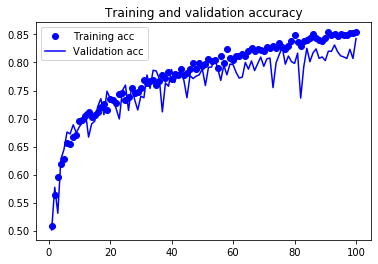

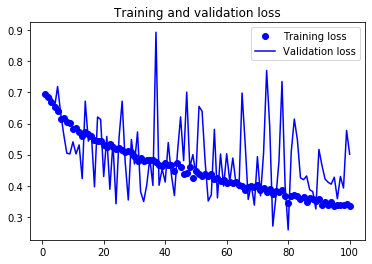

In [42]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

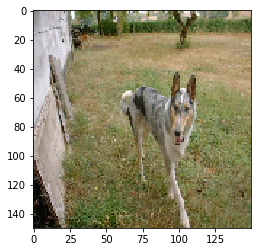

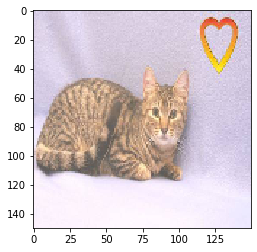

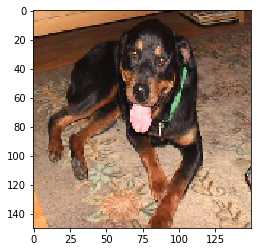

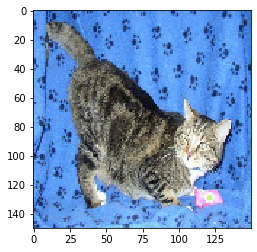

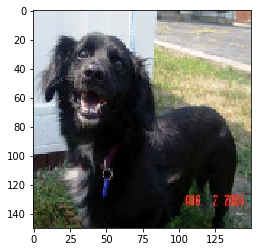

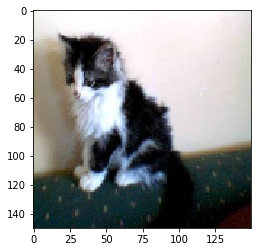

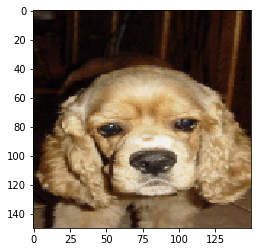

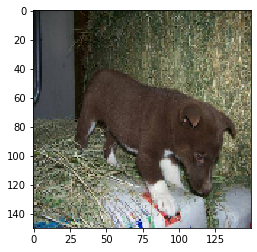

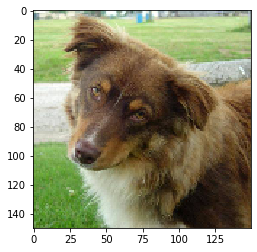

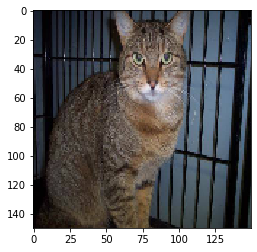

In [45]:
import math
from random import randint
predlist=[]

for i in range(10):
    
    img_path=f'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/dogs-vs-cats/test1/{randint(1,1000)}.jpg'
    from tensorflow.keras.preprocessing import image
    import numpy as np
    img=image.load_img(img_path,target_size=(150,150))
    img_tensor=image.img_to_array(img)
    img_tensor=np.expand_dims(img_tensor,axis=0)
    img_tensor/=255
    predlist.append(model.predict(img_tensor))
    import matplotlib.pyplot as plt
    plt.imshow(img_tensor[0])
    plt.show()

In [47]:
for pred in predlist:
    if pred>=.50:
        print('dog')
    else:
        print("cat")
predlist

dog
cat
dog
cat
dog
cat
dog
dog
dog
cat


[array([[0.97855514]], dtype=float32),
 array([[0.16733123]], dtype=float32),
 array([[0.9933542]], dtype=float32),
 array([[0.00694032]], dtype=float32),
 array([[0.88612044]], dtype=float32),
 array([[0.44711772]], dtype=float32),
 array([[0.99767023]], dtype=float32),
 array([[0.88374245]], dtype=float32),
 array([[0.98213905]], dtype=float32),
 array([[0.09612029]], dtype=float32)]

In [49]:
img_path=f'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/{download}.jpg'
from tensorflow.keras.preprocessing import image
import numpy as np
img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255
predlist.append(model.predict(img_tensor))
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

NameError: name 'download' is not defined